In [ ]:
import pandas as pd
import random
import numpy as np
import itertools
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 3.1 MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.DataFrame()
data = pd.read_csv('/content/drive/Shareddrives/POC/small_complaints.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919.0,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559
1,1,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616
2,2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,31909.0,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5319887
3,3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44133.0,NaN,Other,Web,2022-03-14,Closed with explanation,Yes,NaN,5320509
4,4,2022-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,19135.0,NaN,Consent not provided,Web,2022-04-01,Closed with explanation,Yes,NaN,5393612


In [ ]:
# Displays percentage of entries that are null in each row
# Removing columns 'Tags' and 'Consumer Disputed'
perc_null = (data.isna().sum())*100/len(data)
print(perc_null)
data.drop(['Unnamed: 0', 'Tags', 'Consumer disputed?','Complaint ID'], axis = 1, inplace = True)


# Drop rows that have more than 10 entries of n/a
data.dropna( axis=0, thresh= 10, inplace= True)


# Since all columns are categorical, fill n/a entries with mode of column
for col in data.columns:
  data.fillna(data[col].mode()[0], inplace = True)


# Remove duplicate rows
data.drop_duplicates(inplace= True)

Unnamed: 0                       0.0000
Date received                    0.0000
Product                          0.0000
Sub-product                     11.5009
Issue                            0.0000
Sub-issue                       30.0566
Consumer complaint narrative    66.4164
Company public response         59.1665
Company                          0.0000
State                            1.2340
ZIP code                         1.2455
Tags                            86.8377
Consumer consent provided?      38.4434
Submitted via                    0.0000
Date sent to company             0.0000
Company response to consumer     0.0001
Timely response?                 0.0000
Consumer disputed?              59.8765
Complaint ID                     0.0000
dtype: float64


In [ ]:
dummy_data = data.copy(deep = True)

In [ ]:
for i in dummy_data.columns:
  dummy_data[i+"1"] = dummy_data[i].factorize()[0]
  dummy_data.drop([i], axis = 1, inplace = True)
  dummy_data.rename(columns={i+"1": i}, inplace=True)

In [ ]:
dummy_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0
2,1,0,0,0,0,0,1,1,2,2,1,0,1,1,0
3,1,0,0,0,2,0,1,1,3,3,2,0,1,1,0
4,2,0,0,1,1,0,0,2,4,4,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2462,0,0,0,28,0,1,1,5,3107,0,0,2337,1,0
999996,531,3,43,41,50,0,0,16,9,195,0,0,1835,1,1
999997,1887,1,38,24,4,0,1,16,27,1533,1,2,524,1,0
999998,854,1,21,24,4,0,1,16,28,34073,1,0,736,1,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = dummy_data.columns
vif_data["VIF"] = [variance_inflation_factor(dummy_data.values, i) for i in range(len(dummy_data.columns))]
  

In [ ]:
vif_data

,feature,VIF
0,Date received,10.688716
1,Product,2.944937
2,Sub-product,3.271662
3,Issue,4.008355
4,Sub-issue,1.735380
5,Consumer complaint narrative,3.099924
6,Company public response,1.628820
7,Company,1.319981
8,State,2.221540
9,ZIP code,2.663985


In [ ]:
dummy_data.drop(["Date received"], axis = 1, inplace = True)

In [ ]:
for i in dummy_data.columns:
  dummy_data[i+"1"] = dummy_data[i].factorize()[0]
  dummy_data.drop([i], axis = 1, inplace = True)
  dummy_data.rename(columns={i+"1": i}, inplace=True)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = dummy_data.columns
vif_data["VIF"] = [variance_inflation_factor(dummy_data.values, i) for i in range(len(dummy_data.columns))]
  

In [ ]:
vif_data

,feature,VIF
0,Product,2.944895
1,Sub-product,3.271073
2,Issue,4.007913
3,Sub-issue,1.735117
4,Consumer complaint narrative,3.099777
5,Company public response,1.628568
6,Company,1.319822
7,State,2.215621
8,ZIP code,2.653801
9,Consumer consent provided?,4.705062


In [ ]:
# Based on the above analysis, I am dropping the Date Received column

data.drop(["Date received"], axis = 1, inplace = True)

In [ ]:
for i in data.columns.drop('Company response to consumer'):
  encoder = ce.BinaryEncoder(cols = i)
  data = encoder.fit_transform(data)
  

In [ ]:
# removing rows that are causing an error in one step. since they aren't that many, we can safely discard them
data.drop(data.index[7019:7021], inplace = True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data['Company response to consumer'].replace({'Closed with non-monetary relief':1, 'Closed with explanation':2, 'In progress':3, 'Closed with monetary relief':4, 'Untimely response':5, 'Closed':6, 'Closed without relief':7, 'Closed with relief':8}, inplace=True)

In [ ]:
data 

,Product_0,Product_1,Product_2,Product_3,Product_4,Sub-product_0,Sub-product_1,Sub-product_2,Sub-product_3,Sub-product_4,...,Date sent to company_5,Date sent to company_6,Date sent to company_7,Date sent to company_8,Date sent to company_9,Date sent to company_10,Date sent to company_11,Company response to consumer,Timely response?_0,Timely response?_1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985314,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,2,0,1
985315,0,0,1,0,0,0,1,0,1,1,...,0,1,0,1,1,0,0,2,1,0
985316,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,1,2,0,1
985317,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,1,2,0,1


In [ ]:
data = data[data['Company response to consumer'] != '2022-03-22']

In [ ]:
y = data['Company response to consumer'].astype('int')
x = data.drop('Company response to consumer',1).astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

<BarContainer object of 8 artists>

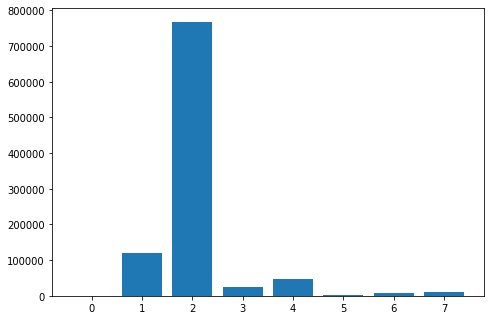

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
yaxis = []
for i in range(8):
  yaxis.append(len(data[data['Company response to consumer'] == i]))
xaxis = [0,1,2,3,4,5,6,7]
ax.bar(xaxis, yaxis)

# Highly imbalanced classes, so accuracy may not be the best metric

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'weighted')

#the closer to 1, the better

0.7652201239112664

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [0,1,2,3,4,5,6,7], 
                     columns = [0,1,2,3,4,5,6,7])

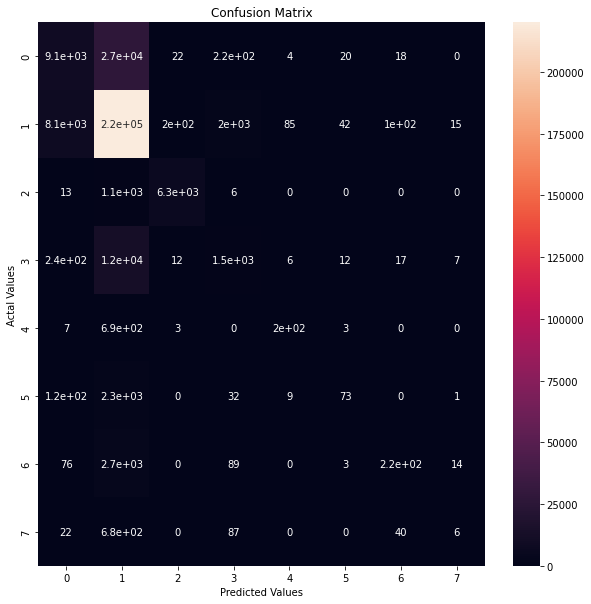

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize = (10,10))


sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_dt, average = 'weighted')

#the closer to 1, the better

0.7305670015335954